比较三个性别的SMPL模型

In [1]:
import numpy as np
import torch
from smplx import SMPL
import open3d as o3d

# 加载 SMPL 模型
neutral_path = r'E:\WorkSpace\inbed_pose_repos\CLIFF\data\smpl\SMPL_NEUTRAL.pkl'  # 替换为你的 SMPL 模型路径
smpl_neutral = SMPL(model_path=neutral_path, gender='neutral')

male_path = r'E:\WorkSpace\inbed_pose_repos\CLIFF\data\smpl\SMPL_MALE.pkl'  # 替换为你的 SMPL 模型路径
smpl_male = SMPL(model_path=male_path, gender='male')

female_path = r'E:\WorkSpace\inbed_pose_repos\CLIFF\data\smpl\SMPL_female.pkl'  # 替换为你的 SMPL 模型路径
smpl_female = SMPL(model_path=female_path, gender='female')

# 生成随机形状和姿态参数
betas = torch.randn(1, 10) / 3  # 随机形状参数
pose = torch.randn(1, 72) / 10   # 随机姿态参数

def create_colored_mesh(smpl_model, betas, pose, translation, color):
    output = smpl_model(betas=betas, body_pose=pose[:, 3:], global_orient=pose[:, :3])
    vertices = output.vertices.detach().cpu().numpy().squeeze()  # 顶点信息
    vertices += translation  # 平移顶点位置以便可视化
    faces = smpl_model.faces  # SMPL 模型的面片信息

    # 创建Open3D网格
    mesh = o3d.geometry.TriangleMesh()
    mesh.vertices = o3d.utility.Vector3dVector(vertices)
    mesh.triangles = o3d.utility.Vector3iVector(faces)

    # 为每个顶点设置颜色
    colors = np.tile(color, (vertices.shape[0], 1))
    mesh.vertex_colors = o3d.utility.Vector3dVector(colors)

    # 计算法线以便于可视化
    mesh.compute_vertex_normals()
    
    return mesh

# 定义颜色
neutral_color = [0.5, 0.5, 0.5]  # 灰色
male_color = [0.0, 0.5, 1.0]     # 蓝色
female_color = [1.0, 0.5, 0.0]   # 黄色

# 创建每个性别的网格，并在 x 轴上进行平移以便区分
neutral_mesh = create_colored_mesh(smpl_neutral, betas, pose, np.array([-2, 0, 0]), neutral_color)
male_mesh = create_colored_mesh(smpl_male, betas, pose, np.array([0, 0, 0]), male_color)
female_mesh = create_colored_mesh(smpl_female, betas, pose, np.array([2, 0, 0]), female_color)

# 可视化
o3d.visualization.draw_geometries([neutral_mesh, male_mesh, female_mesh])

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


d:\Program Files\Anaconda\envs\pt3_9\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import numpy as np
import torch
from smplx import SMPL
import open3d as o3d

# 加载 SMPL 模型
neutral_path = r'E:\WorkSpace\inbed_pose_repos\CLIFF\data\smpl\SMPL_NEUTRAL.pkl'  # 替换为你的 SMPL 模型路径
smpl_neutral = SMPL(model_path=neutral_path, gender='neutral')

male_path = r'E:\WorkSpace\inbed_pose_repos\CLIFF\data\smpl\SMPL_MALE.pkl'  # 替换为你的 SMPL 模型路径
smpl_male = SMPL(model_path=male_path, gender='male')

female_path = r'E:\WorkSpace\inbed_pose_repos\CLIFF\data\smpl\SMPL_female.pkl'  # 替换为你的 SMPL 模型路径
smpl_female = SMPL(model_path=female_path, gender='female')

# 生成随机形状和姿态参数
betas = torch.randn(1, 10) / 10  # 随机形状参数
pose = torch.randn(1, 72) / 10   # 随机姿态参数

def create_colored_mesh_and_joints(smpl_model, betas, pose, translation, color, joint_color):
    output = smpl_model(betas=betas, body_pose=pose[:, 3:], global_orient=pose[:, :3])
    vertices = output.vertices.detach().cpu().numpy().squeeze()  # 顶点信息
    vertices += translation  # 平移顶点位置以便可视化
    joint = output.joints.detach().cpu().numpy().squeeze()  # 关节信息
    joints = joint + translation  # 平移关节位置以便可视化
    faces = smpl_model.faces  # SMPL 模型的面片信息
    # print(joints)
    # 创建Open3D网格
    mesh = o3d.geometry.TriangleMesh()
    mesh.vertices = o3d.utility.Vector3dVector(vertices)
    mesh.triangles = o3d.utility.Vector3iVector(faces)

    # 为每个顶点设置颜色
    colors = np.tile(color, (vertices.shape[0], 1))
    mesh.vertex_colors = o3d.utility.Vector3dVector(colors)

    # 计算法线以便于可视化
    mesh.compute_vertex_normals()
    
    # 创建Open3D点云来表示关节
    joint_pcd = o3d.geometry.PointCloud()
    joint_pcd.points = o3d.utility.Vector3dVector(joints)
    joint_pcd.colors = o3d.utility.Vector3dVector(np.tile(joint_color, (joints.shape[0], 1)))
    
    return mesh, joint_pcd, joint

# 定义颜色
neutral_color = [0.5, 0.5, 0.5]  # 灰色
male_color = [0.0, 0.0, 1.0]     # 蓝色
female_color = [1.0, 0.0, 0.0]   # 红色
joint_color = [0.0, 1.0, 0.0]    # 绿色

# 创建每个性别的网格和关节，并在 x 轴上进行平移以便区分
neutral_mesh, neutral_joints,j1 = create_colored_mesh_and_joints(smpl_neutral, betas, pose, np.array([0, 0, 0]), neutral_color, joint_color)
male_mesh, male_joints,j2 = create_colored_mesh_and_joints(smpl_male, betas, pose, np.array([0, 0, 0]), male_color, joint_color)
female_mesh, female_joints,j3 = create_colored_mesh_and_joints(smpl_female, betas, pose, np.array([0, 0, 0]), female_color, joint_color)

# 可视化

o3d.visualization.draw_geometries([neutral_joints])
# o3d.visualization.draw_geometries([neutral_mesh, neutral_joints, male_mesh, male_joints, female_mesh, female_joints])


随机生成SMPL模型并可视化关节点

In [15]:
import numpy as np
import torch
from smplx import SMPL
import open3d as o3d

# 加载 SMPL 模型
neutral_path = r'E:\WorkSpace\inbed_pose_repos\CLIFF\data\smpl\SMPL_NEUTRAL.pkl'  # 替换为你的 SMPL 模型路径
smpl_neutral = SMPL(model_path=neutral_path, gender='neutral')

# 生成随机形状和姿态参数
betas = torch.randn(1, 10) / 10  # 随机形状参数
pose = torch.randn(1, 72) / 10   # 随机姿态参数

def create_joints(smpl_model, betas, pose, translation):
    output = smpl_model(betas=betas, body_pose=pose[:, 3:], global_orient=pose[:, :3])
    vertices = output.vertices.detach().cpu().numpy().squeeze()  # 顶点信息
    vertices += translation  # 平移顶点位置以便可视化
    joint = output.joints.detach().cpu().numpy().squeeze()  # 关节信息
    joints = joint + translation  # 平移关节位置以便可视化
    faces = smpl_model.faces  # SMPL 模型的面片信息

    return joints

joints = create_joints(smpl_neutral, betas, pose, np.array([0, 0, 0]))

# o3d.visualization.draw_geometries([neutral_mesh, neutral_joints, male_mesh, male_joints, female_mesh, female_joints])


In [16]:
joints = joints[:24,:].copy()

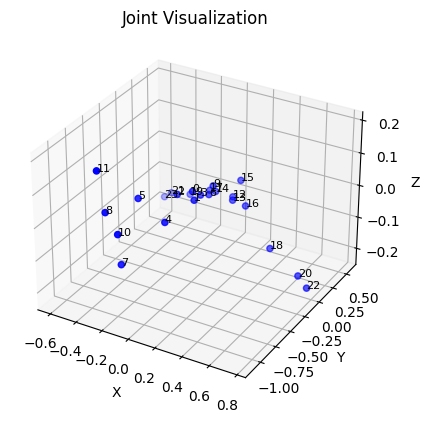

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# 假设 joints 是一个形状为 (N, 3) 的NumPy数组，其中 N 是关节点的数量

# 创建一个新的图形
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制关节点和连线
ax.scatter(joints[:, 0], joints[:, 1], joints[:, 2], c='b', marker='o', label='Joints')

# 添加关节点的序号标注
for i, (x, y, z) in enumerate(joints):
    ax.text(x, y, z, str(i), color='black', fontsize=8)

# 设置图形的标题和坐标轴标签
ax.set_title('Joint Visualization')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# 显示图形
plt.show()
smpl_keypoints_2d = joints[:,:-1]

In [33]:
# SLP 到 SMPL 关节点的映射
slp_to_smpl_mapping = {
    0: 8,
    1: 5,
    2: 2,
    3: 1,
    4: 4,
    5: 7,
    6: 21,
    7: 19,
    8: 17,
    9: 16,
    10: 18,  
    11: 20,
    12: 12,
    13: 15
}
import torch

# 假设 smpl_keypoints_2d 是 SMPL 关节点的张量
# 提取对应的 SMPL 关节点
slp_indices = torch.tensor([slp_to_smpl_mapping[i] for i in range(len(slp_to_smpl_mapping))])
# smpl_corresponding_keypoints = smpl_keypoints_2d[slp_indices, :]
smpl_corresponding_keypoints = smpl_keypoints_2d[list(slp_to_smpl_mapping.values())]
slp_indices, smpl_corresponding_keypoints.shape

(tensor([ 8,  5,  2,  1,  4,  7, 21, 19, 17, 16, 18, 20, 12, 15]), (14, 2))

In [34]:
smpl_corresponding_keypoints,smpl_keypoints_2d

(array([[-0.24912715, -1.05401623],
        [-0.19979125, -0.66247237],
        [-0.07916771, -0.30399755],
        [ 0.05683519, -0.32081509],
        [ 0.01314023, -0.6899811 ],
        [-0.14309433, -1.04161859],
        [-0.5268836 ,  0.52223903],
        [-0.31309307,  0.39428431],
        [-0.10005657,  0.27205724],
        [ 0.22252108,  0.16986692],
        [ 0.44864243,  0.08670222],
        [ 0.68417859,  0.03451316],
        [ 0.07920873,  0.27170801],
        [ 0.11372881,  0.33023536]]),
 array([[-0.00169633, -0.2223762 ],
        [ 0.05683519, -0.32081509],
        [-0.07916771, -0.30399755],
        [ 0.00891995, -0.11533361],
        [ 0.01314023, -0.6899811 ],
        [-0.19979125, -0.66247237],
        [ 0.01075445,  0.0176137 ],
        [-0.14309433, -1.04161859],
        [-0.24912715, -1.05401623],
        [ 0.01815375,  0.07223098],
        [-0.12528647, -1.11862576],
        [-0.28984198, -1.08363414],
        [ 0.07920873,  0.27170801],
        [ 0.12786376,  0.1

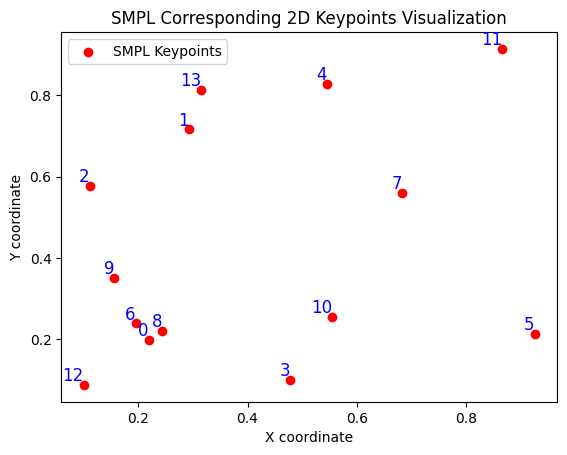

In [35]:
import matplotlib.pyplot as plt

# 假设 smpl_corresponding_keypoints 是一个形状为 [num_joints, 2] 的张量
# 例如，创建一个示例张量作为示范
import torch
smpl_corresponding_keypoints = torch.rand(14, 2)  # 生成随机数据作为示例

# 创建一个图和一个轴
fig, ax = plt.subplots()

# 绘制关节点
x_coords = smpl_corresponding_keypoints[:, 0].numpy()
y_coords = smpl_corresponding_keypoints[:, 1].numpy()
ax.scatter(x_coords, y_coords, c='red', label='SMPL Keypoints')

# 为每个关节点添加标签
for i, (x, y) in enumerate(zip(x_coords, y_coords)):
    ax.text(x, y, str(i), color="blue", fontsize=12, ha='right', va='bottom')

# 设置图例
ax.legend()

# 设置图表标题
ax.set_title('SMPL Corresponding 2D Keypoints Visualization')

# 显示坐标轴标签
ax.set_xlabel('X coordinate')
ax.set_ylabel('Y coordinate')

# 展示图表
plt.show()


In [28]:
j1[0:24,:] - j2[0:24,:]

array([[ 0.00041334,  0.01948778, -0.00040717],
       [ 0.00862094,  0.01019153,  0.01254494],
       [-0.00831351,  0.02164283,  0.00737949],
       [-0.01066554,  0.00601809,  0.01249969],
       [ 0.00340834,  0.02284676, -0.00257202],
       [-0.00268589,  0.02234787,  0.00294887],
       [-0.00624639,  0.00537013, -0.01376901],
       [ 0.00959378,  0.05216479, -0.00840309],
       [ 0.00116622,  0.04566491, -0.00138402],
       [-0.00376869,  0.00134981,  0.00969822],
       [-0.0057596 ,  0.05788112, -0.01033249],
       [ 0.01552647,  0.0574528 , -0.00446457],
       [ 0.00731016,  0.00517577,  0.00041698],
       [ 0.00309236,  0.00948456, -0.00559241],
       [-0.00182047,  0.00688581, -0.00599028],
       [ 0.00631997, -0.01952538, -0.00134434],
       [-0.0280757 , -0.00820249,  0.00283695],
       [ 0.01874352, -0.00312933, -0.006191  ],
       [-0.02334633, -0.00517875, -0.00113315],
       [ 0.02534831, -0.001845  ,  0.00345806],
       [-0.04133743, -0.01051641,  0.001

In [26]:
j2[0:24,:] 

array([[-0.00201417, -0.24086358,  0.02876856],
       [ 0.04466781, -0.33240697,  0.02876302],
       [-0.07378083, -0.32300088,  0.01580065],
       [ 0.02731856, -0.12370316, -0.02123629],
       [-0.00200493, -0.7185772 ,  0.06480058],
       [-0.1833688 , -0.694801  ,  0.02386142],
       [ 0.02223665,  0.00984334,  0.02255961],
       [-0.07403241, -1.1407723 ,  0.01945117],
       [-0.26982337, -1.0969523 , -0.07809021],
       [ 0.00946325,  0.06437407,  0.02681985],
       [-0.02635986, -1.203582  ,  0.13826853],
       [-0.34289977, -1.1677591 ,  0.03055125],
       [-0.05068426,  0.26490483, -0.0229773 ],
       [ 0.05265668,  0.19185981,  0.00709854],
       [-0.09445374,  0.1519902 , -0.01363311],
       [-0.06831117,  0.34903148,  0.03356504],
       [ 0.16909939,  0.25183415, -0.00425043],
       [-0.21258003,  0.17742983, -0.03176093],
       [ 0.42298365,  0.26841992,  0.03359915],
       [-0.46269518,  0.10360433, -0.06465808],
       [ 0.67954355,  0.31317618,  0.089